In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D
plt.style.use('dark_background')


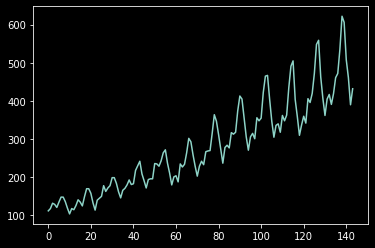

In [88]:
df = read_csv('data/AirPassengers.csv', usecols=[1])
plt.plot(df)


In [89]:
dataset = df.values
dataset = dataset.astype('float32')

In [90]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [92]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

train


array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [93]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)


In [94]:
seq_size = 10
#can be larger for larger datasets, number of previous values the forecast is predicted using

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [95]:
print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))

Shape of training set: (89, 10)
Shape of test set: (33, 10)


In [97]:
trainX = trainX.reshape((trainX.shape[0], 1, 1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

In [98]:
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, seq_size)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 1, 64)          19200     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 21,313
Trainable params: 21,313
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Train on 89 samples, validate on 33 samples
Epoch 1/100
 - 6s - loss: 0.0814 - val_loss: 0.4164
Epoch 2/100
 - 0s - loss: 0.0617 - val_loss: 0.3344
Epoch 3/100
 - 0s - loss: 0.0444 - val_loss: 0.2620
Epoch 4/100
 - 1s - loss: 0.0312 - val_loss: 0.1986
Epoch 5/100
 - 0s - loss: 0.0203 - val_loss: 0.1451
Epoch 6/100
 - 1s - loss: 0.0140 - val_loss: 0.1008
Epoch 7/100
 - 1s - loss: 0.0104 - val_loss: 0.0682
Epoch 8/100
 - 1s - loss: 0.0094 - val_loss: 0.0479
Epoch 9/100
 - 1s - loss: 0.0101 - val_loss: 0.0376
Epoch 10/100
 - 0s - loss: 0.0109 - val_loss: 0.0340
Epoch 11/100
 - 1s - loss: 0.0108 - val_loss: 0.0350
Epoch 12/100
 - 1s - loss: 0.0099 - val_loss: 0.0384
Epoch 13/100
 - 0s - loss: 0.0091 - val_loss: 0.0438
Epoch 14/100
 - 1s - loss: 0.0083 - val_loss: 0.0491
Epoch 15/100
 - 1s - loss: 0.0079 - val_loss: 0.0530
Epoch 16/100
 - 1s - loss: 0.0078 - val_loss: 0.0546
Epoch 17/100
 - 0s - loss: 0.0076 - val_loss: 0.0526
Epoch 18/100
 - 1s - loss: 0.0073 - val_loss: 0.0480
Epoch 19/10

In [100]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [101]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [102]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 20.50 RMSE


In [103]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Test Score: 50.13 RMSE


In [104]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict


In [110]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

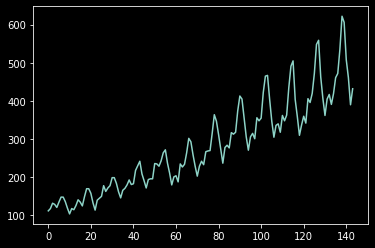

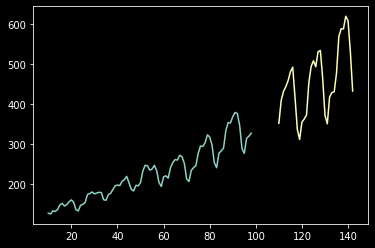

In [111]:
plt.plot(scaler.inverse_transform(dataset))
plt.show()
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [112]:
trainPredictPlot

array([[       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [127.034096],
       [125.37575 ],
       [133.138   ],
       [131.45348 ],
       [136.20921 ],
       [147.65231 ],
       [151.78261 ],
       [145.17657 ],
       [148.59367 ],
       [155.6374  ],
       [160.55946 ],
       [154.56479 ],
       [135.65706 ],
       [133.05316 ],
       [147.08475 ],
       [149.31273 ],
       [154.429   ],
       [174.08571 ],
       [176.36227 ],
       [180.281   ],
       [175.55309 ],
       [177.61647 ],
       [179.55316 ],
       [178.88103 ],
       [160.90529 ],
       [159.47177 ],
       [173.10828 ],
       [176.77106 ],
       [186.40616 ],
       [195.8697  ],
       [197.68765 ],
       [196.30313 ],
       [207.30374 ],
       [211.11244 ],
       [219.39093 ],
       [203.21849 ],
       [186.89655 ],
       [182.8